In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.dates as mdates  #Importing module for date formatting
import matplotlib.ticker as ticker  # Importing ticker for customizing colorbar ticks
from scipy.ndimage import gaussian_filter
import seaborn as sns
import glob
from datetime import datetime

In [2]:
# Specify the path to the variables
path_to_variables = sorted(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_rad_d02_2020-03-*"))
# Specify the path to the latitude and longitude data
path_to_lat_lon = '/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_01/compressed/wrfout_wind_d02_2020-03-13_00_00_00'

In [3]:
path_to_variabless = sorted(glob.glob("/glade/campaign/ral/wsap/tjuliano/comble/coupled_meso_micro/RESTART_*/compressed/wrfout_wind_d02_2020-03-*"))

In [4]:
xr.open_dataset(path_to_variabless[0])

<xarray.Dataset>
Dimensions:      (Time: 1, bottom_top: 135, south_north: 8400, west_east: 3780, bottom_top_stag: 136, west_east_stag: 3781, south_north_stag: 8401)
Coordinates:
    XLAT         (Time, south_north, west_east) float32 ...
    XLONG        (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, south_north, west_east, bottom_top_stag, west_east_stag, south_north_stag
Data variables: (12/30)
    ALT          (Time, bottom_top, south_north, west_east) float32 ...
    CBASEHT      (Time, south_north, west_east) float32 ...
    CBASEHT_TOT  (Time, south_north, west_east) float32 ...
    CTOPHT       (Time, south_north, west_east) float32 ...
    CTOPHT_TOT   (Time, south_north, west_east) float32 ...
    HFX          (Time, south_north, west_east) float32 ...
    ...           ...
    U            (Time, bottom_top, south_north, west_east_stag) float32 ...
    U10          (Time, south_north, west_east) float32 ...
    UST          (Time, south_north, west_east) float32 ...
    V            (Time, bottom_top, south_north_stag, west_east) float32 ...
    V10          (Time, south_north, west_east) float32 ...
    W            (Time, bottom_top_stag, south_north, west_east) float32 ...
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2020-03-12_22:00:00
    WEST-EAST_GRID_DIMENSION:        3781
    SOUTH-NORTH_GRID_DIMENSION:      8401
    BOTTOM-TOP_GRID_DIMENSION:       136
    DX:                              150.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0
    history:                         Sun Feb 26 21:38:34 2023: ncks --cnk_csh...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...

In [4]:
# xr.open_dataset(path_to_lat_lon)

In [5]:
wind_vars = xr.open_dataset(path_to_lat_lon)
height_meters = wind_vars['HGT']  # 'HGT' is in meters

In [6]:
height_meters['XLAT'].values

array([[[68.22537 , 68.22577 , 68.226166, ..., 69.10871 , 69.10878 ,
         69.10885 ],
        [68.22669 , 68.22709 , 68.227486, ..., 69.11009 , 69.11016 ,
         69.11023 ],
        [68.22802 , 68.22841 , 68.228806, ..., 69.111465, 69.11154 ,
         69.1116  ],
        ...,
        [78.87237 , 78.87312 , 78.87387 , ..., 80.680046, 80.6802  ,
         80.68036 ],
        [78.87352 , 78.87427 , 78.87502 , ..., 80.68141 , 80.681564,
         80.681725],
        [78.87469 , 78.87543 , 78.87619 , ..., 80.68278 , 80.682945,
         80.68309 ]]], dtype=float32)

In [7]:
# # xr.open_mfdataset(path_to_variables)
# pd.date_range(start="2020-03-13", periods=len(path_to_variables[:]), freq='5T')

In [7]:
# Assuming path_to_variables is a list of paths to your dataset files
datasets = [xr.open_dataset(i) for i in path_to_variables[:]]

# Generate the time dimension
time_dim = pd.date_range(start="2020-03-13", periods=len(path_to_variables[:]), freq='5T')

rainnc_datasets = []  # List to hold the 'RAINNC' variable datasets

# Assuming each dataset corresponds to a single time point,
# extract 'RAINNC' and add the time dimension to it
for i, ds in enumerate(datasets):
    # Extract 'RAINNC' variable
    rainnc = ds['RAINNC']

    # Add the time dimension as a coordinate
    rainnc = rainnc.assign_coords(time=time_dim[i]).expand_dims("time")

    # Append the processed 'RAINNC' to the list
    rainnc_datasets.append(rainnc)

print("Done extracting and adding time to 'RAINNC'")
print("==================")
print("Concatenating 'RAINNC' files")

# Concatenate the 'RAINNC' datasets along the time dimension
combined_rainnc = xr.concat(rainnc_datasets, dim='time')

print("DONE with concatenation!")
print("==================")
print("Saving 'RAINNC' data to netCDF")

# Save the combined 'RAINNC' data to a new netCDF file
combined_rainnc.to_netcdf("RAINNC_wrfout_2020_03_13_00_00_00-2020_03_14_00_00_00.nc")

print("Done saving 'RAINNC' data to file!!!")
print("DONE!")


Done extracting and adding time to 'RAINNC'
Concatenating 'RAINNC' files
DONE with concatenation!
Saving 'RAINNC' data to netCDF
Done saving 'RAINNC' data to file!!!
DONE!


In [9]:
data = xr.open_dataset('RAINNC_wrfout_2020_03_13_00_00_00-2020_03_14_00_00_00.nc').squeeze('Time')
data = data.sel(time=slice("2020-03-13T04:00:00.000000000", "2020-03-14T00:00:00.000000000"))
data_andenes = data.isel(south_north=282, west_east=1651)
data_andenes

<xarray.Dataset>
Dimensions:  (time: 241)
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13T04:00:00 ... 2020-03-14
Data variables:
    RAINNC   (time) float32 ...

In [10]:
time = data_andenes['time']
rainnc = data_andenes['RAINNC']

In [11]:
data = {"time": time,"rainnc": rainnc}

df = pd.DataFrame(data=data)
df

,time,rainnc
0,2020-03-13 04:00:00,7.102650
1,2020-03-13 04:05:00,7.141771
2,2020-03-13 04:10:00,7.182107
3,2020-03-13 04:15:00,7.197089
4,2020-03-13 04:20:00,7.202566
...,...,...
236,2020-03-13 23:40:00,11.295522
237,2020-03-13 23:45:00,11.295522
238,2020-03-13 23:50:00,11.295522
239,2020-03-13 23:55:00,11.296454


In [12]:
# Ensure the DataFrame is sorted by time
df.sort_values(by='time', inplace=True)

# Calculate the difference in precipitation to get the change per 5 minutes
df['rainnc_change_5min'] = df['rainnc'].diff()

# Convert the 5-minute precipitation change to an hourly rate
# by multiplying by 12 (since there are 12, 5-minute intervals in an hour)
df['rainnc_rate_mm_per_hr'] = df['rainnc_change_5min'] * 12

# Handling the first NaN value in 'rainnc_change_5min' and 'rainnc_rate_mm_per_hr'
df['rainnc_change_5min'].fillna(0, inplace=True)
df['rainnc_rate_mm_per_hr'].fillna(0, inplace=True)

# Display the DataFrame to verify the results
df

,time,rainnc,rainnc_change_5min,rainnc_rate_mm_per_hr
0,2020-03-13 04:00:00,7.102650,0.000000,0.000000
1,2020-03-13 04:05:00,7.141771,0.039122,0.469460
2,2020-03-13 04:10:00,7.182107,0.040336,0.484028
3,2020-03-13 04:15:00,7.197089,0.014982,0.179781
4,2020-03-13 04:20:00,7.202566,0.005477,0.065723
...,...,...,...,...
236,2020-03-13 23:40:00,11.295522,0.000000,0.000000
237,2020-03-13 23:45:00,11.295522,0.000000,0.000000
238,2020-03-13 23:50:00,11.295522,0.000000,0.000000
239,2020-03-13 23:55:00,11.296454,0.000933,0.011192


In [8]:
# plt.subplots()
# plt.scatter(df['time'], df['rainnc_change_5min'])

In [9]:
# plt.subplots()
# plt.scatter(df['time'], df['rainnc_rate_mm_per_hr'])

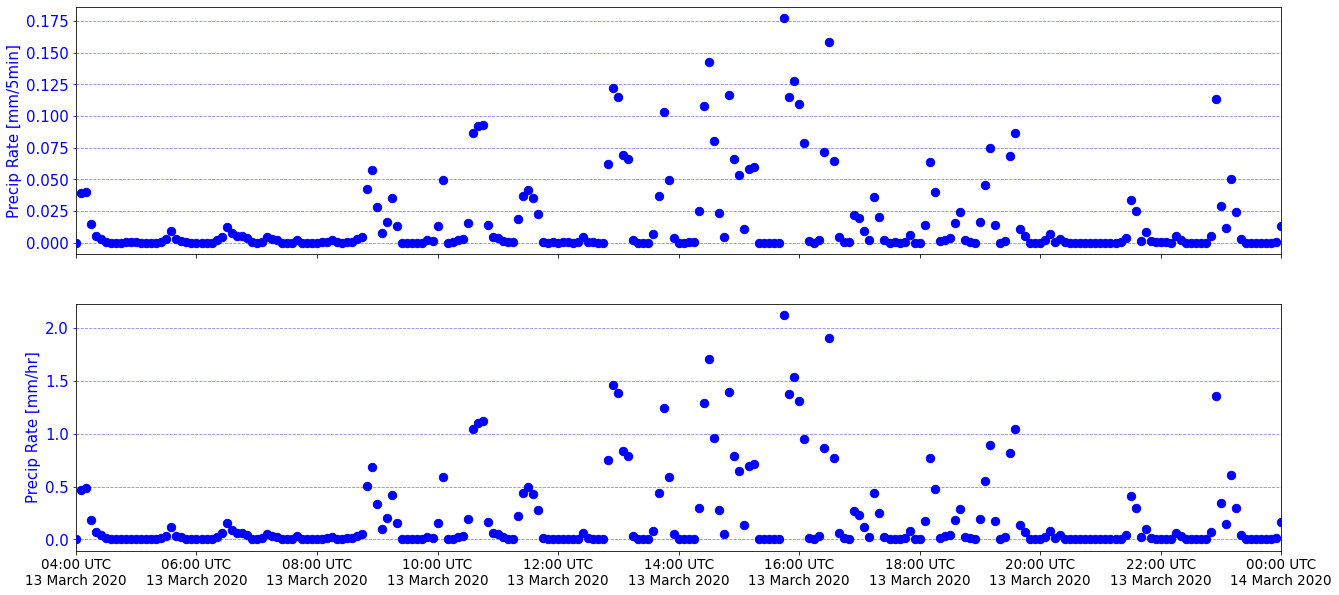

In [13]:
fig, ax = plt.subplots(figsize=(27, 10), nrows=2, ncols=1, sharex=True)
ax = ax.flatten()

for i, v in enumerate(ax):
    if i == 0:
        pcm = ax[i].scatter(df['time'], df['rainnc_change_5min'], color='blue', zorder=3, s=70)
        # ax[i].set_yticks(np.arange(0, round(np.nanmax(liquid_water_path.values))+0.1, 0.5))
        # ax[i].spines['left'].set_color('blue')
        ax[i].tick_params(axis='y', colors='blue', labelsize=15)
        ax[i].set_ylabel("Precip Rate [mm/5min]", c = "blue", fontsize=15)
        cbar = fig.colorbar(pcm, ax=ax[i], extend='neither')
        # # set colorbar to invisible
        cbar.ax.set_visible(False)
        ax[i].grid(axis="y", ls = '--', c = "blue",alpha = 0.5)


    if i == 1:
        pcm = ax[i].scatter(df['time'], df['rainnc_rate_mm_per_hr'], color='blue', zorder=3, s=70)
        # ax[i].set_yticks(np.arange(0, round(np.nanmax(liquid_water_path.values))+0.1, 0.5))
        # ax[i].spines['left'].set_color('blue')
        ax[i].tick_params(axis='y', colors='blue', labelsize=15)
        ax[i].set_ylabel("Precip Rate [mm/hr]", c = "blue", fontsize=15)
        cbar = fig.colorbar(pcm, ax=ax[i], extend='neither')
        # # set colorbar to invisible
        cbar.ax.set_visible(False)
        ax[i].grid(axis="y", ls = '--', c = "blue",alpha = 0.5)




    
    # Custom datetime format
custom_date_format = "%H:%M UTC\n%d %B %Y"  # Format example: 04:00 UTC\n13 March 2020

# Formatting the x-axis with datetime information
ax[-1].xaxis.set_major_formatter(mdates.DateFormatter(custom_date_format))

# Setting the xlim to cover the full range of dates
ax[-1].set_xlim([df['time'].min(), df['time'].max()])

# Custom tick positions and labels for the x-axis
num_ticks = 11  # Number of tick labels
tick_positions = np.linspace(0, len(df['time']) - 1, num_ticks, dtype=int)
tick_labels = [df['time'].iloc[pos].strftime(custom_date_format) for pos in tick_positions]
ax[-1].set_xticks(df['time'].iloc[tick_positions])
ax[-1].set_xticklabels(tick_labels, fontsize=13.5, rotation=0);  # Adjust fontsize and rotation as needed
fig.savefig("precip-rate.jpg", dpi=500, bbox_inches='tight')

In [14]:
pwd

'/glade/work/noteng/masters-research/comble/LES'